Data exploration is an essential part of data science. In order to fully understand the data, we must first understand descriptive statistics. In this exercise, we are going to use the bike sharing dataset from UCI machine learning repository.

For a full description of the dataset, click [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

data = pd.read_csv('bike_rental_hour.csv')

### Measuring the Central Tendency

Suppose we are interested in finding the central tendency of the data. Specifically, we want to grasp what the "middle" of the data is. I assume the readers of my blog would probably understand hwo to calculate the mean, median, and mode. So I won't go into details about it.

The question is which one of these metrics is the best for measuring the central tendency.

The answer: <b>It depends</b>.

#### The Categorical Case:

Let's take a look at the plot below. We have the seasons seperated into four categories on the x-axis, and we have the number of data rows on the y-axis.

From the documentation:

+ 1: Spring
+ 2: Summer
+ 3: Fall
+ 4: Winter


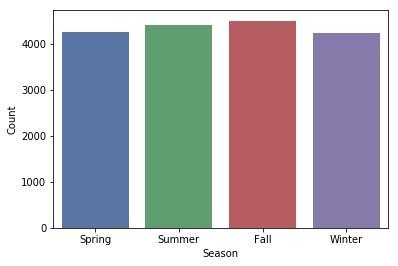

Mean: 2.5
Median: 3.0
Mode: 3


In [2]:
ax = sns.countplot(data['season'], palette = 'deep')
ax.set_ylabel('Count')
ax.set_xlabel('Season')
plt.xticks(range(4), ('Spring', 'Summer', 'Fall', 'Winter'))
plt.show()

print('Mean: {}'.format(data['season'].mean().round(1)))
print('Median: {}'.format(data['season'].median()))
print('Mode: {}'.format(data['season'].mode()[0]))

In this case, it doesn't make sense to use the mean nor the median. Each bar shown on the plot represents a different category. If we want to know the most frequent season in our data, we should use the <b>mode</b>.

#### The Ordinal Case:

Let's take a look at the plot below. We have the weather seperated into four categories on the x-axis, and we have the number of rows on the y-axis.

From the documentation: 

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

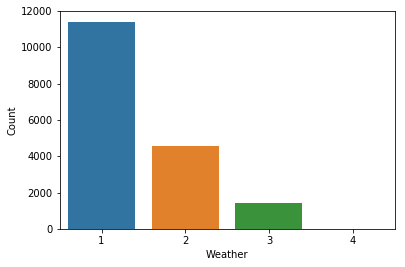

Mean: 1.4
Median: 1.0
Mode: 1


In [3]:
ax = sns.countplot(data['weathersit'])
ax.set_ylabel('Count')
ax.set_xlabel('Weather')
plt.show()

print('Mean: {}'.format(data['weathersit'].mean().round(1)))
print('Median: {}'.format(data['weathersit'].median()))
print('Mode: {}'.format(data['weathersit'].mode()[0]))

In this case, it doesn't make sense to use the mean to grasp the central tendency of the data. The arithmetic mean is 1.4, but this value doesn't have any intrinsic meaning.

The data is ranked from 1 to 4, where 1 represents the best weather conditions. We call this the ordinal case. In a sense, this is similar to the categorical case. However, the data is not completely categorical as there is ordering to the data. In this case, we should use the <b>median</b> to grasp the central tendency.

#### The Continuous Case (not skewed)

So what happens when we are not working with categorical data? Consider the plot below, we have the normalized humidity on the x-axis, and we have the number of rows on the y-axis.

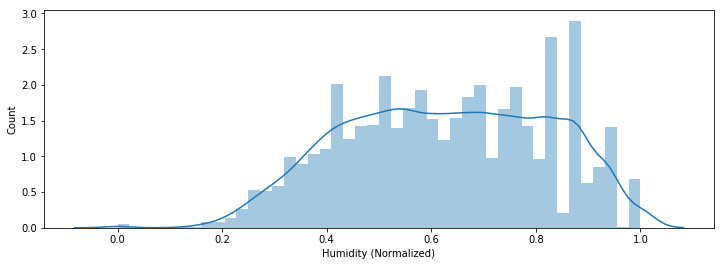

Mean: 0.63
Median: 0.63
Mode: 0.88


In [4]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(data['hum'].dropna())
ax.set_ylabel('Count')
ax.set_xlabel('Humidity (Normalized)')
plt.show()

print('Mean: {}'.format(data['hum'].mean().round(2)))
print('Median: {}'.format(data['hum'].median()))
print('Mode: {}'.format(data['hum'].mode()[0]))

In this case, we have a histogram that is similar to the normal distribution. In this case, the <b>mean</b> would work best at grasping the central tendency. In fact, if this histogram is perfectly symmetrical, the mean would be exactly the same as the median.

#### The Continuous Case (skewed)

So what happens when the data does not look like the normal distribution curve at all? Consider the plot below, we have the number of rentals on the x-axis, and we have the number of rows on the y-axis.

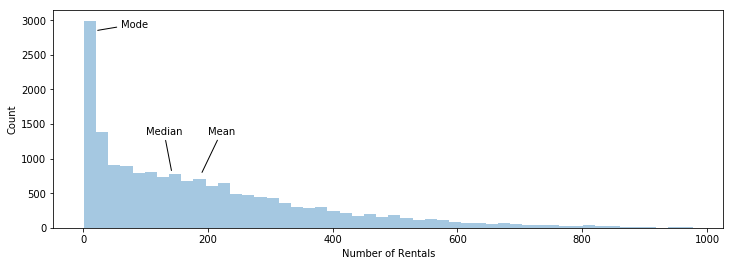

Mean: 189.5
Median: 142.0
Mode: 5
Std Dev: 181.4


In [12]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(data['cnt'].dropna(), kde=False)

ax.set_ylabel('Count')
ax.set_xlabel('Number of Rentals')
ax.annotate('Mode', xy=(20, 2850), xytext=(60, 2900),
            arrowprops={'arrowstyle': '-'})
ax.annotate('Median', xy=(142, 800), xytext=(100, 1350),
            arrowprops={'arrowstyle': '-'})
ax.annotate('Mean', xy=(189, 775), xytext=(200, 1350),
            arrowprops={'arrowstyle': '-'})
plt.show()

print('Mean: {}'.format(data['cnt'].mean().round(1)))
print('Median: {}'.format(data['cnt'].median()))
print('Mode: {}'.format(data['cnt'].mode()[0]))
print('Std Dev: {}'.format(data['cnt'].std().round(1)))

The case above is an example of a right skewed distribution or a positively skewed distribution. The frequency curve has a tail to the right and <b>Mean > Median > Mode</b>.

In a left skewed distribution or negatively skewed distribution, the frequency curve has a longer tail to the left and the <b>Mean < Median < Mode</b>.

In our case, the mean overestimates the central tendency of the data, because the values are distorted by the large number of rentals on the right side of the distribution. In this case, I would use the <b>median</b> the represent the central tendency.




#### Measuring Skewness

Pearson's First Coefficient of Skewness is defined as:

$$ SK_1 = \frac{(\bar X- Mo)}{\sigma}$$

If we have a mode with a low count, it is usually better to use Pearson's Second Coefficient of Skewness:

$$ SK_2 = \frac{3*(\bar X - Md)}{\sigma}$$

Where $\bar X$ = mean, $Mo$ = mode, $Md$ = median, and $\sigma$ = standard deviation. In general, the direction of skewness is given by the sign of this coefficient. If the coefficient is equal to zero, then there is no skewness. 

In our case, the first coefficient of skewness was 1.02 and the second coefficient of skewness was 0.786. Both coefficients were positive indicating that the data is positively skewed.


---

In summary I would follow this table:

| Type of Variable        | Best Measure of Central Tendency |
|-------------------------|----------------------------------|
| Categorical             | Mode                             |
| Ordinal                 | Median                           |
| Continuous (not skewed) | Mean                             |
| Continuous (skewed)     | Median                           |

For an indepth explanation on what each type of variable means, click [here](https://statistics.laerd.com/statistical-guides/types-of-variable.php).